In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
from sklearn.ensemble import BaggingRegressor
import xgboost
from numpy import nan
from numpy import isnan
from sklearn.metrics import mean_squared_error

In [8]:
null_series =train_data.isnull().sum()
print('No of columns with null values\n', null_series[null_series > 0].sort_values(ascending=False))

No of columns with null values
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [10]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
missing_values =test_data.isnull().sum()
print('No of columns with null values\n', missing_values[missing_values > 0].sort_values(ascending=True))

No of columns with null values
 TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


In [12]:
print("train shape: ",train_data.shape)
print("test shape: ",test_data.shape)

train shape:  (1460, 81)
test shape:  (1459, 80)


In [13]:
print("train shape: ",train_data.shape)
print("test shape: ",test_data.shape)

train shape:  (1460, 81)
test shape:  (1459, 80)


In [14]:
train_data.drop(['Alley','PoolQC','Fence','MiscFeature','Id','LotFrontage', 'FireplaceQu'],axis=1,inplace=True)
test_data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu', 'LotFrontage'],axis=1,inplace=True)

In [15]:
print("train shape: ",train_data.shape)
print("test shape: ",test_data.shape)

train shape:  (1460, 74)
test shape:  (1459, 74)


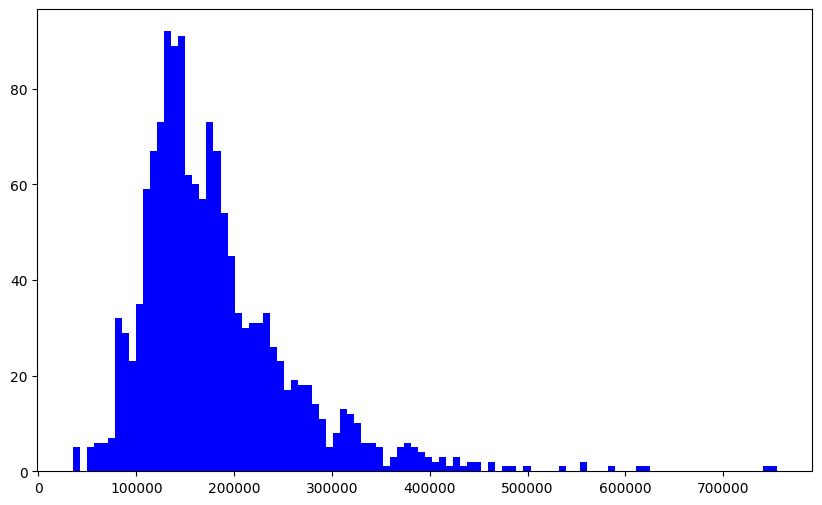

In [16]:
train_data['SalePrice'].hist(bins = 100, grid = False, color = 'blue', figsize = (10,6))
plt.show()

In [17]:
train_data.agg({'SalePrice':['mean', 'median','skew','kurtosis', 'std','min','max']})

,SalePrice
mean,180921.195890
median,163000.000000
skew,1.882876
kurtosis,6.536282
std,79442.502883
min,34900.000000
max,755000.000000


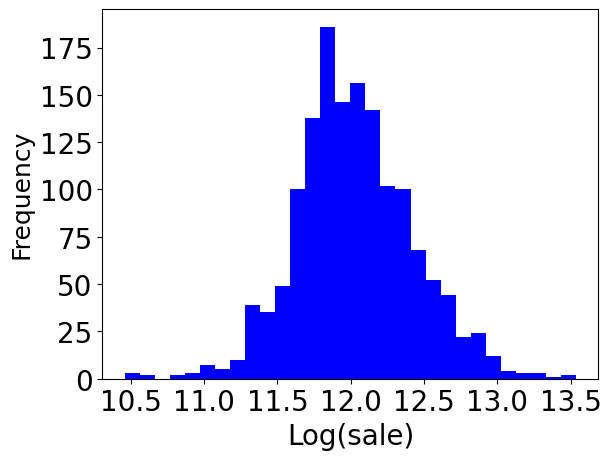

In [18]:
np.log(train_data['SalePrice']).plot.hist(bins=30, color = 'blue')
plt.xlabel('Log(sale)', fontsize=20)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.show()

In [19]:
#Numerical Features
train_numerical_subset = train_data.select_dtypes(include = [np.number])
train_numerical_subset

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


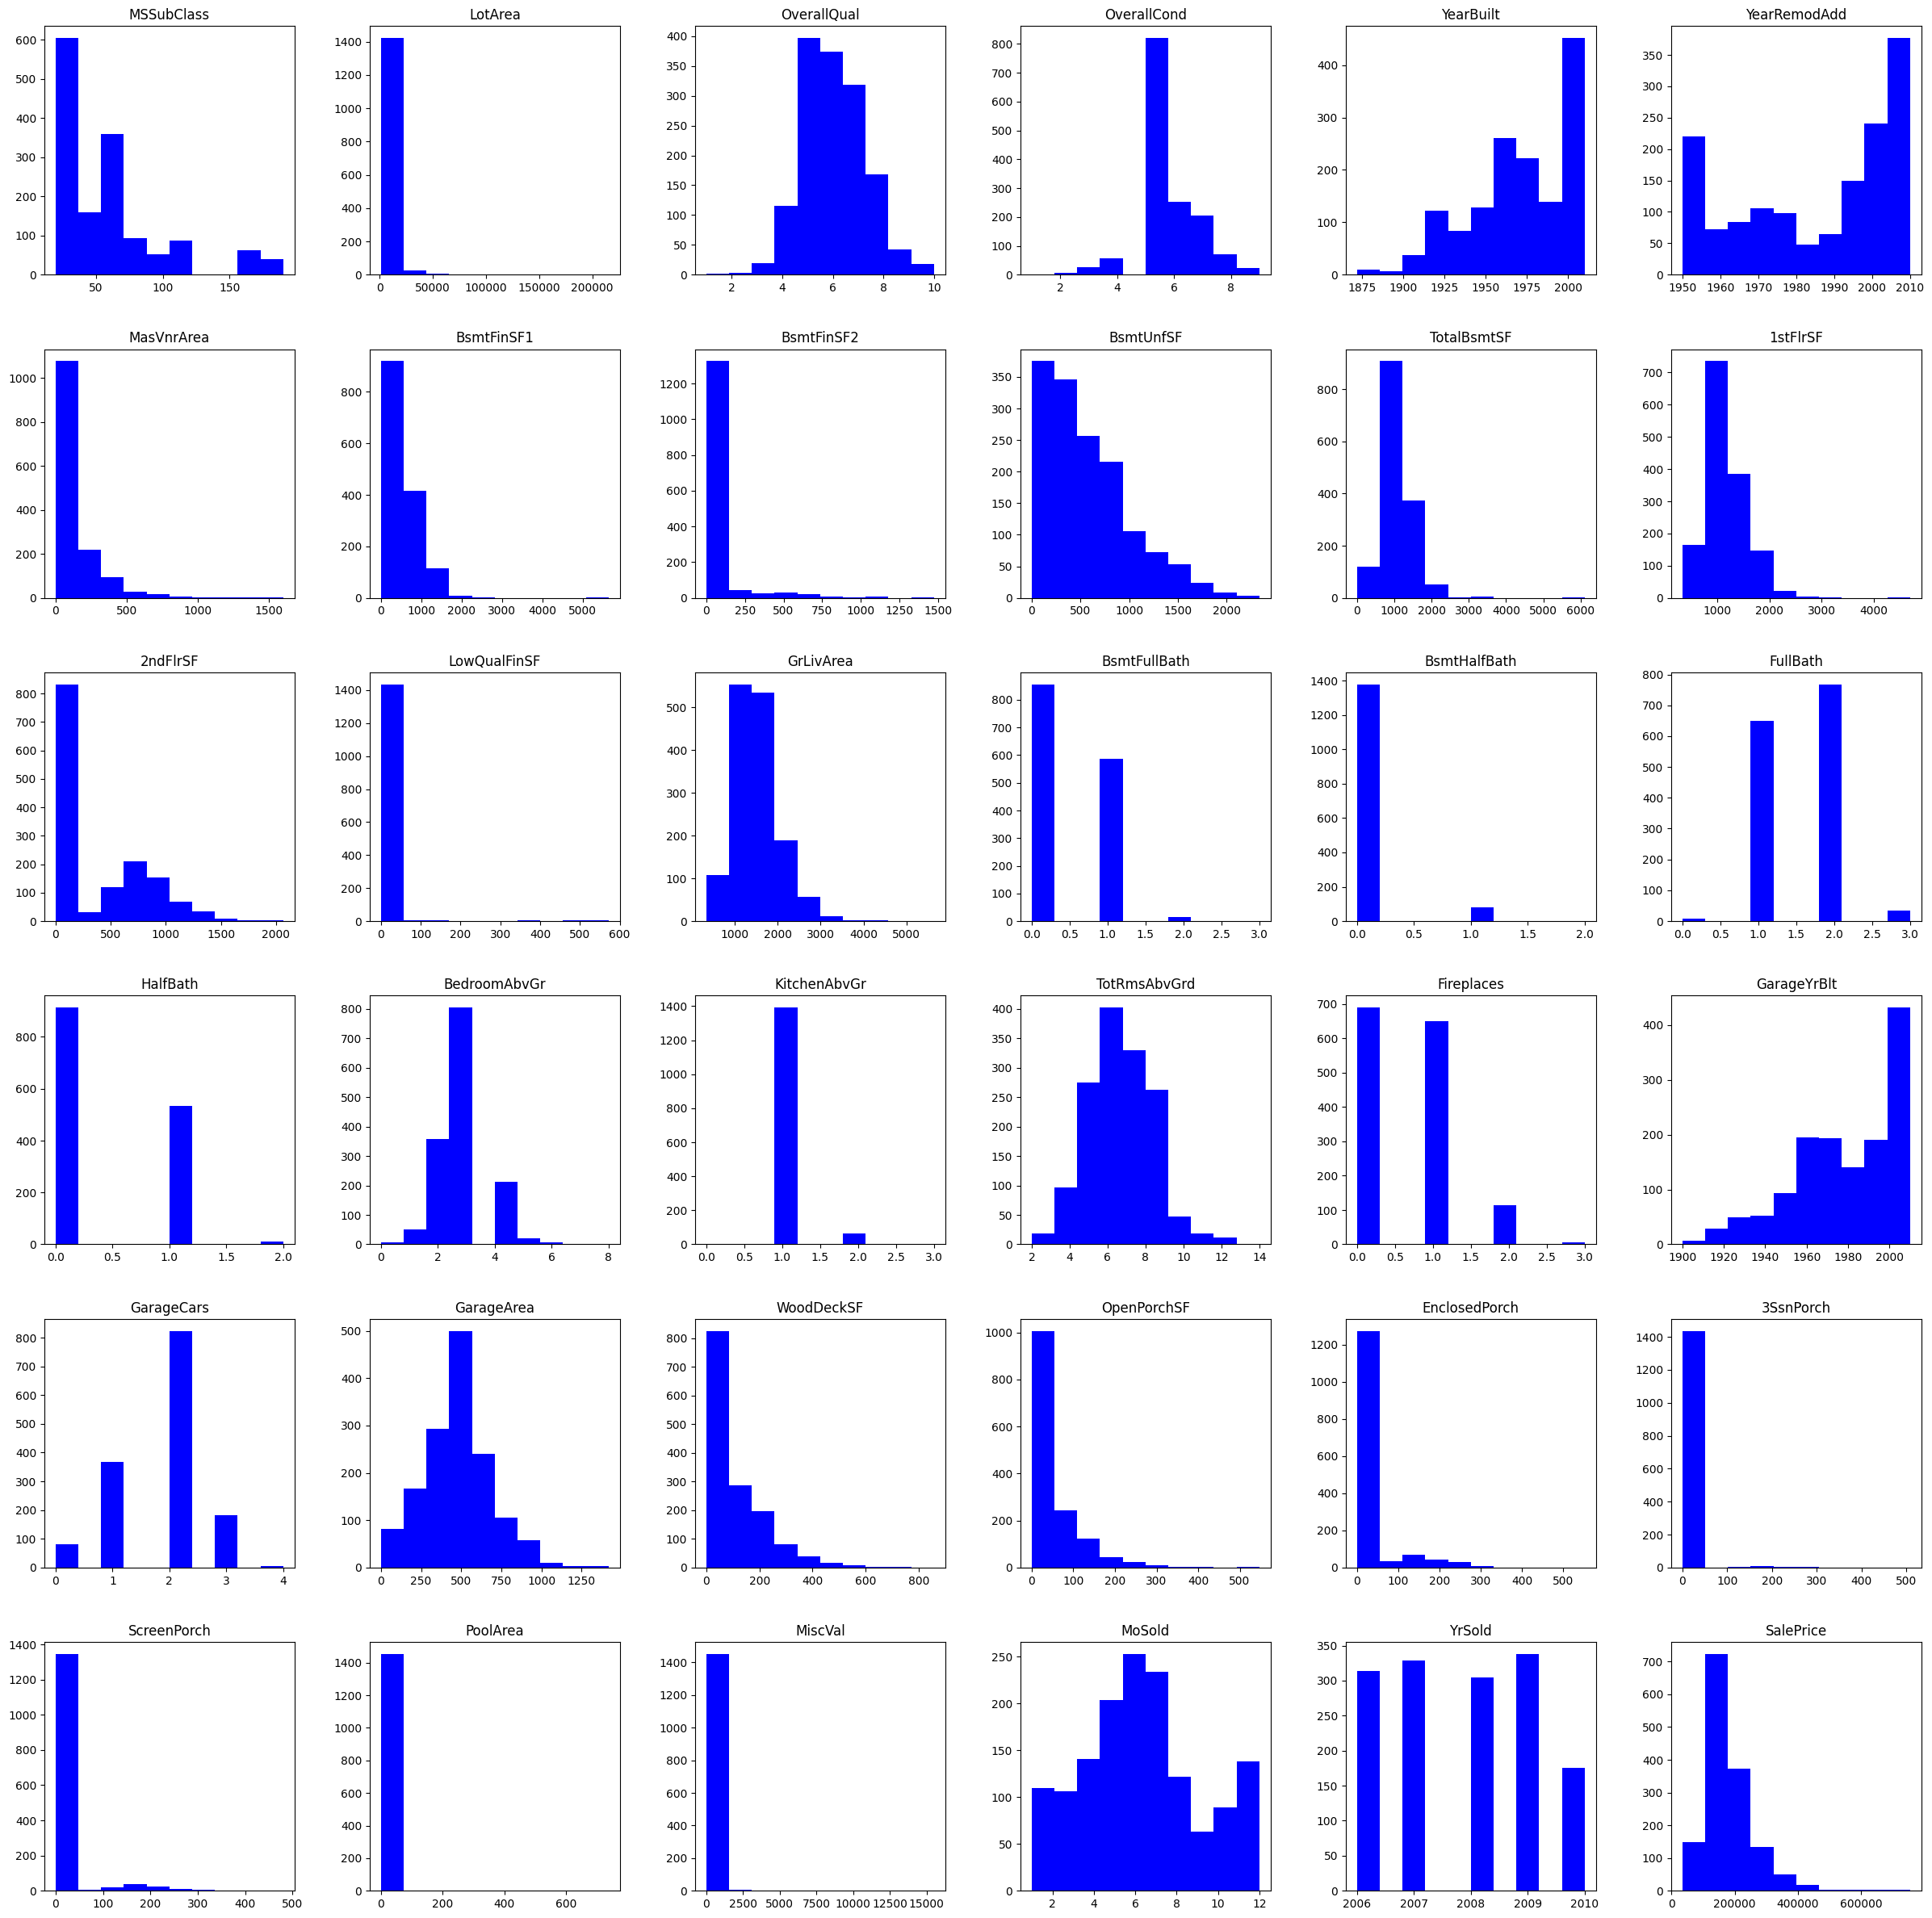

In [20]:
train_numerical_subset.hist(figsize = (30,30), grid = False, color ='blue')
plt.show()

In [21]:
num_rows = len(train_numerical_subset.index)
low_information_cols = []

for col in train_numerical_subset.columns:
    cnts = train_numerical_subset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

BsmtFinSF2: 88.56164%
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

LowQualFinSF: 98.21918%
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

BsmtHalfBath: 94.38356%
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

KitchenAbvGr: 95.34247%
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

EnclosedPorch: 85.75342%
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

3SsnPorch: 98.35616%
0      1436
168       3
144     

In [22]:
train_numerical_subset = train_numerical_subset.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath','LowQualFinSF'])
train_numerical_subset

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,150,856,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,284,1262,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,434,920,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,540,756,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,490,1145,...,9,1,2000.0,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,953,953,...,7,1,1999.0,2,460,0,40,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,589,1542,...,7,2,1978.0,2,500,349,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,877,1152,...,9,2,1941.0,1,252,0,60,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,0,1078,...,5,0,1950.0,1,240,366,0,4,2010,142125


In [23]:
test_numerical_subset = test_data.select_dtypes(include = [np.number])
test_numerical_subset = test_numerical_subset.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath','LowQualFinSF'])
test_numerical_subset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,270.0,...,2,5,0,1961.0,1.0,730.0,140,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,406.0,...,3,6,0,1958.0,1.0,312.0,393,36,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,137.0,...,3,6,1,1997.0,2.0,482.0,212,34,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,324.0,...,3,7,1,1998.0,2.0,470.0,360,36,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,1017.0,...,2,5,0,1992.0,2.0,506.0,0,82,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,3,5,0,NaN,0.0,0.0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,294.0,...,3,6,0,1970.0,1.0,286.0,0,24,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,4,7,1,1960.0,2.0,576.0,474,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,575.0,...,3,6,0,NaN,0.0,0.0,80,32,7,2006


In [24]:
#Correlations between numerical features and target variable (SalePrice)
correlation = train_numerical_subset.corr()['SalePrice'].sort_values().dropna()
correlation.head()

MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
MoSold          0.046432
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64

In [25]:
correlation.tail()

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

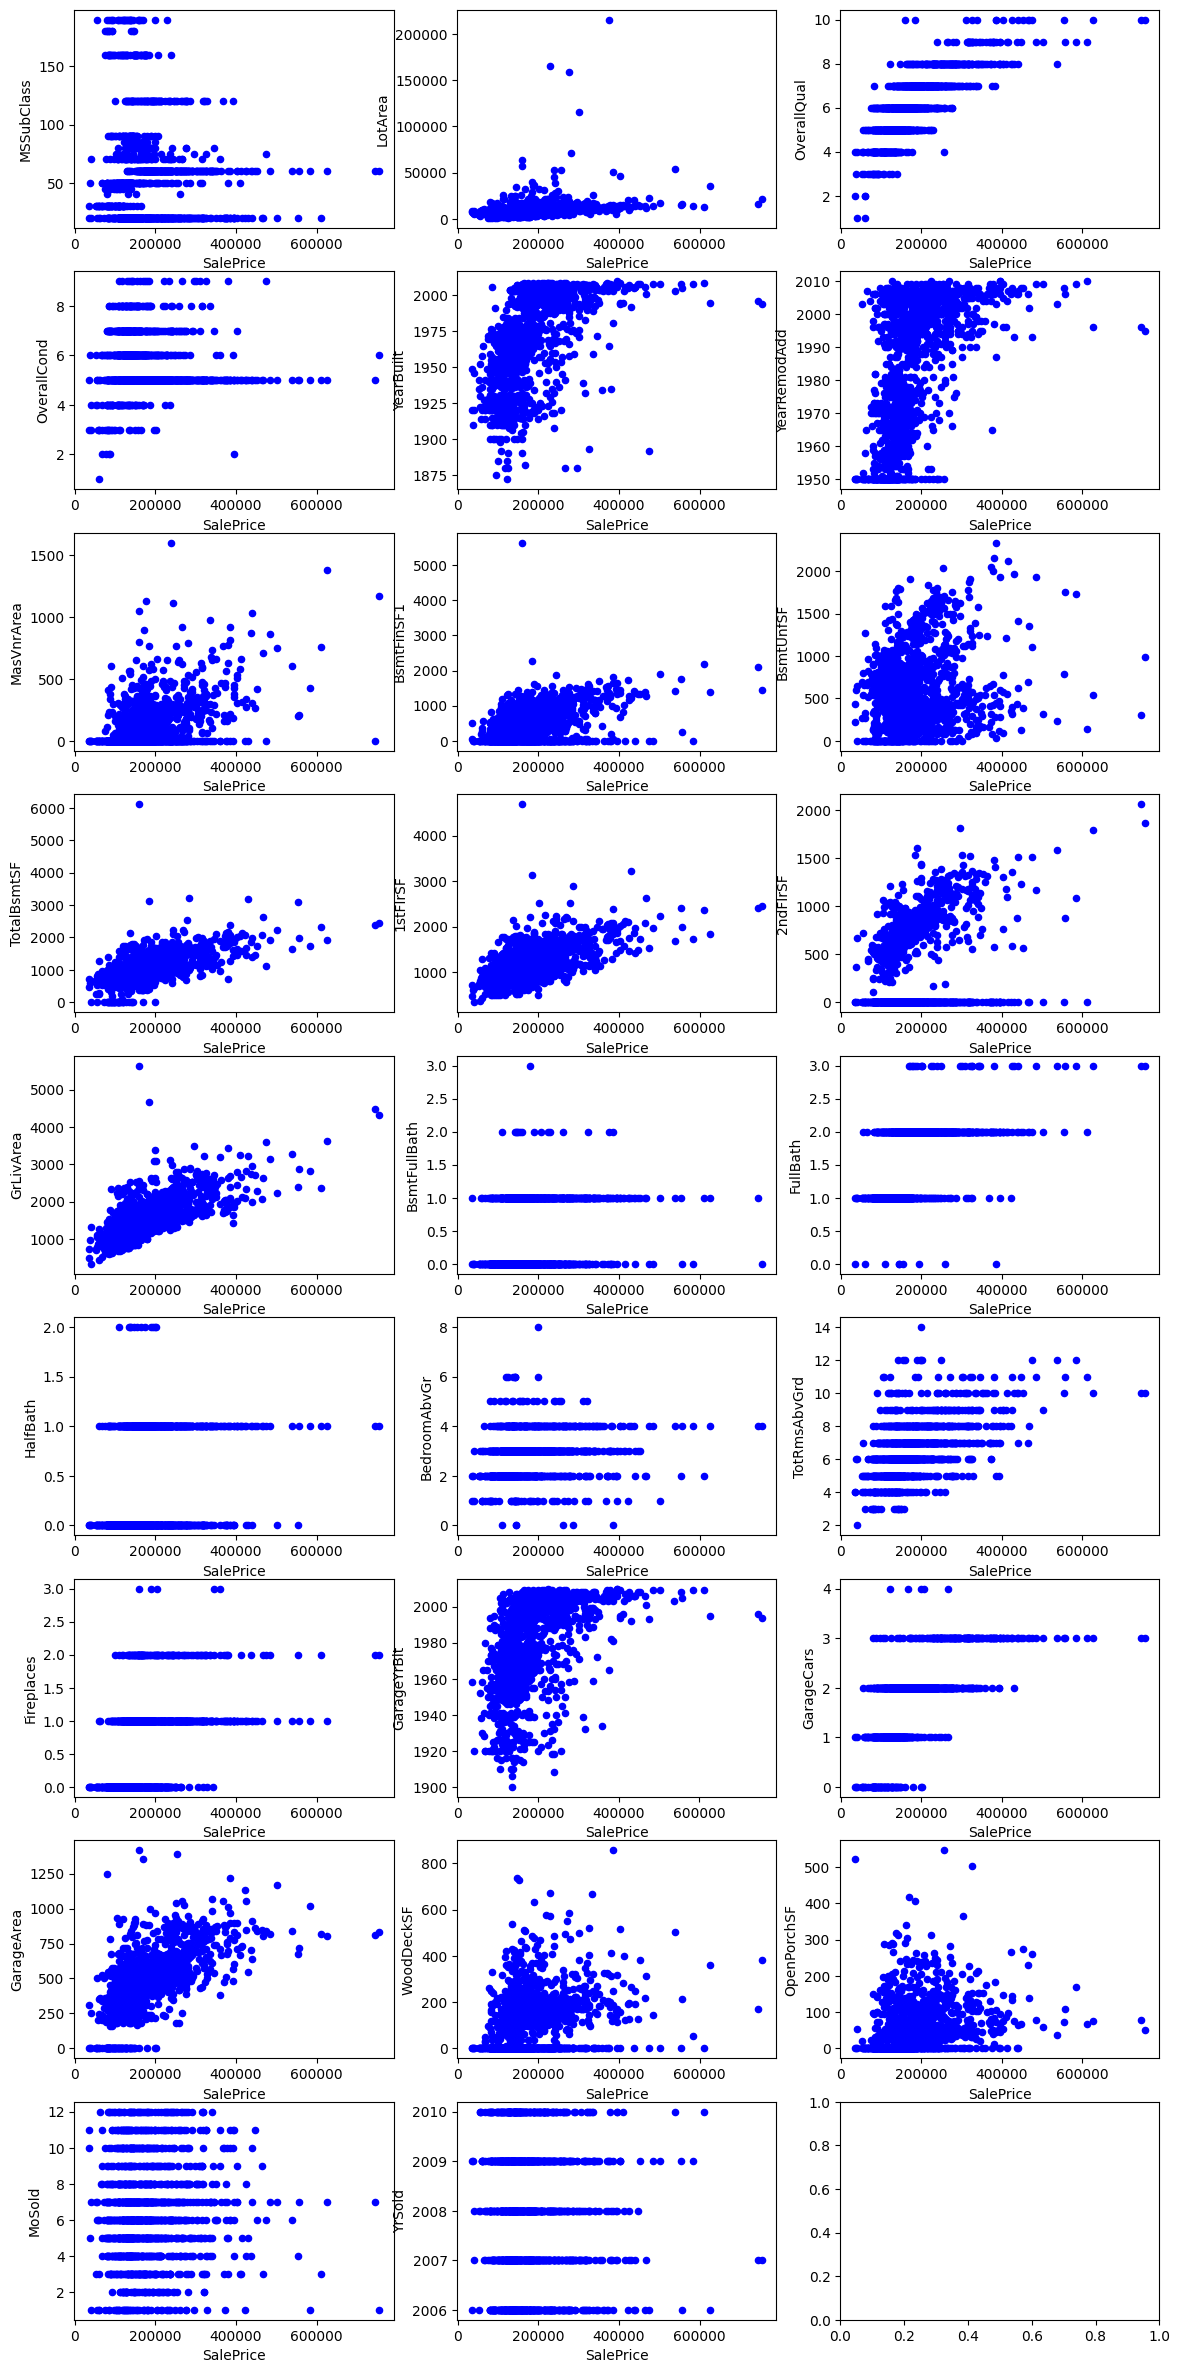

In [26]:
fig, axes = plt.subplots(9, 3, figsize=(14, 30))
axe = axes.ravel()
for i, col in enumerate(train_numerical_subset.columns.values[:-1]):
    train_numerical_subset.plot(x=('SalePrice'),y=(col),ax=axe[i], kind = 'scatter', color='blue')
plt.show()

In [27]:
np.seterr(divide = 'ignore')
log_train_numerical_subset = np.log(train_numerical_subset)
log_train_numerical_subset = log_train_numerical_subset.replace(to_replace = float('-inf'), value = 0)
log_train_numerical_subset

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,6.752270,...,2.079442,0.000000,7.602401,0.693147,6.306275,0.000000,4.110874,0.693147,7.604894,12.247694
1,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,7.140453,...,1.791759,0.000000,7.588830,0.693147,6.131226,5.697093,0.000000,1.609438,7.604396,12.109011
2,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,6.824374,...,1.791759,0.000000,7.601402,0.693147,6.410175,0.000000,3.737670,2.197225,7.604894,12.317167
3,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,6.628041,...,1.945910,0.000000,7.599902,1.098612,6.464588,0.000000,3.555348,0.693147,7.603898,11.849398
4,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,7.043160,...,2.197225,0.000000,7.600902,1.098612,6.728629,5.257495,4.430817,2.484907,7.604894,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,6.859615,6.859615,...,1.945910,0.000000,7.600402,0.693147,6.131226,0.000000,3.688879,2.079442,7.604396,12.072541
1456,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,4.779123,6.672033,6.378426,7.340836,...,1.945910,0.693147,7.589842,0.693147,6.214608,5.855072,0.000000,0.693147,7.605890,12.254863
1457,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,0.000000,5.616771,6.776507,7.049255,...,2.197225,0.693147,7.570959,0.000000,5.529429,0.000000,4.094345,1.609438,7.605890,12.493130
1458,2.995732,9.181632,1.609438,1.791759,7.575585,7.598900,0.000000,3.891820,0.000000,6.982863,...,1.609438,0.000000,7.575585,0.000000,5.480639,5.902633,0.000000,1.386294,7.605890,11.864462


In [28]:
log_test_numerical_subset = np.log(test_numerical_subset)
log_test_numerical_subset = log_test_numerical_subset.replace(to_replace = float('-inf'), value = 0)
log_test_numerical_subset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,7.286876,2.995732,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,5.598422,...,0.693147,1.609438,0.0,7.581210,0.000000,6.593045,4.941642,0.000000,1.791759,7.605890
1,7.287561,2.995732,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,6.006353,...,1.098612,1.791759,0.0,7.579679,0.000000,5.743003,5.973810,3.583519,1.791759,7.605890
2,7.288244,4.094345,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,4.919981,...,1.098612,1.791759,0.0,7.599401,0.693147,6.177944,5.356586,3.526361,1.098612,7.605890
3,7.288928,4.094345,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,5.780744,...,1.098612,1.945910,0.0,7.599902,0.693147,6.152733,5.886104,3.583519,1.791759,7.605890
4,7.289611,4.787492,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,6.924612,...,0.693147,1.609438,0.0,7.596894,0.693147,6.226537,0.000000,4.406719,0.000000,7.605890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.977625,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,...,1.098612,1.609438,0.0,NaN,0.000000,0.000000,0.000000,0.000000,1.791759,7.603898
1455,7.977968,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,...,1.098612,1.791759,0.0,7.585789,0.000000,5.655992,0.000000,3.178054,1.386294,7.603898
1456,7.978311,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,1.386294,1.945910,0.0,7.580700,0.693147,6.356108,6.161207,0.000000,2.197225,7.603898
1457,7.978654,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,...,1.098612,1.791759,0.0,NaN,0.000000,0.000000,4.382027,3.465736,1.945910,7.603898


In [29]:
#Transforming the categorical data
train_categorical_subset = train_data.select_dtypes(exclude = [np.number])
train_categorical_subset

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [30]:
num_rows = len(train_categorical_subset.index)
low_information_cols = []

for col in train_categorical_subset.columns:
    cnts = train_categorical_subset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Street: 99.58904%
Pave    1454
Grvl       6
Name: Street, dtype: int64

LandContour: 89.79452%
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities: 99.93151%
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LandSlope: 94.65753%
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Condition1: 86.30137%
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2: 98.97260%
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

RoofMatl: 98.21918%
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

ExterCond: 87.80822%
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

BsmtCo

In [31]:
train_categorical_subset = train_categorical_subset.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
train_categorical_subset

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,Attchd,RFn,Normal
1456,RL,Reg,Inside,NWAmes,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,CBlock,Gd,No,ALQ,TA,TA,Attchd,Unf,Normal
1457,RL,Reg,Inside,Crawfor,1Fam,2Story,Gable,CemntBd,CmentBd,None,Ex,Stone,TA,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1458,RL,Reg,Inside,NAmes,1Fam,1Story,Hip,MetalSd,MetalSd,None,TA,CBlock,TA,Mn,GLQ,Gd,Gd,Attchd,Unf,Normal


In [32]:
test_categorical_subset = test_data.select_dtypes(exclude = [np.number])
test_categorical_subset = test_categorical_subset.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
test_categorical_subset

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RH,Reg,Inside,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,Unf,Normal
1,RL,IR1,Corner,NAmes,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,TA,Gd,Attchd,Unf,Normal
2,RL,IR1,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,GLQ,Gd,TA,Attchd,Fin,Normal
3,RL,IR1,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,Ex,Gd,Attchd,Fin,Normal
4,RL,IR1,Inside,StoneBr,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Gd,PConc,Gd,No,ALQ,Ex,Gd,Attchd,RFn,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Inside,MeadowV,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,No,Unf,Gd,TA,NaN,NaN,Normal
1455,RM,Reg,Inside,MeadowV,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,No,Rec,TA,TA,CarPort,Unf,Abnorml
1456,RL,Reg,Inside,Mitchel,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,No,ALQ,Ex,TA,Detchd,Unf,Abnorml
1457,RL,Reg,Inside,Mitchel,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,PConc,Gd,Av,GLQ,TA,TA,NaN,NaN,Normal


In [33]:
train_categorical_subset.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
LotShape,1460,4,Reg,925
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
BldgType,1460,5,1Fam,1220
HouseStyle,1460,8,1Story,726
RoofStyle,1460,6,Gable,1141
Exterior1st,1460,15,VinylSd,515
Exterior2nd,1460,16,VinylSd,504
MasVnrType,1452,4,None,864


In [34]:
test_categorical_subset.describe().T

,count,unique,top,freq
MSZoning,1455,5,RL,1114
LotShape,1459,4,Reg,934
LotConfig,1459,5,Inside,1081
Neighborhood,1459,25,NAmes,218
BldgType,1459,5,1Fam,1205
HouseStyle,1459,7,1Story,745
RoofStyle,1459,6,Gable,1169
Exterior1st,1458,13,VinylSd,510
Exterior2nd,1458,15,VinylSd,510
MasVnrType,1443,4,None,878


In [35]:
train_categorical_subset['HouseStyle'] = train_categorical_subset['HouseStyle'].replace(['2.5Fin'],train_categorical_subset['HouseStyle'].mode())
train_categorical_subset['Exterior1st'] = train_categorical_subset['Exterior1st'].replace(['Stone'],train_categorical_subset['Exterior1st'].mode())
train_categorical_subset['Exterior1st'] = train_categorical_subset['Exterior1st'].replace(['ImStucc'],train_categorical_subset['Exterior1st'].mode())
train_categorical_subset['Exterior2nd'] = train_categorical_subset['Exterior2nd'].replace(['Other'],train_categorical_subset['Exterior1st'].mode())

In [36]:
train_categorical_subset = pd.get_dummies(train_categorical_subset)
test_categorical_subset = pd.get_dummies(test_categorical_subset)

print(train_categorical_subset.shape)
print(test_categorical_subset.shape)

(1460, 137)
(1459, 137)


In [37]:
train_features = pd.concat([log_train_numerical_subset,train_categorical_subset], axis = 1)
test_features = pd.concat([log_test_numerical_subset,test_categorical_subset], axis = 1)

In [38]:
train_features = train_features[:-1]
train_features

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,6.752270,...,0,0,1,0,0,0,0,0,1,0
1,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,7.140453,...,0,0,1,0,0,0,0,0,1,0
2,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,6.824374,...,0,0,1,0,0,0,0,0,1,0
3,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,6.628041,...,1,0,0,1,1,0,0,0,0,0
4,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,7.043160,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.995732,8.922658,1.945910,1.609438,7.602900,7.603399,0.000000,6.016157,6.698268,7.107425,...,0,0,1,0,0,0,0,0,1,0
1455,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,6.859615,6.859615,...,0,0,1,0,0,0,0,0,1,0
1456,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,4.779123,6.672033,6.378426,7.340836,...,0,0,0,1,0,0,0,0,1,0
1457,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,0.000000,5.616771,6.776507,7.049255,...,0,0,1,0,0,0,0,0,1,0


In [39]:
test_features

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7.286876,2.995732,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,5.598422,...,0,0,0,1,0,0,0,0,1,0
1,7.287561,2.995732,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,6.006353,...,0,0,0,1,0,0,0,0,1,0
2,7.288244,4.094345,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,4.919981,...,0,1,0,0,0,0,0,0,1,0
3,7.288928,4.094345,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,5.780744,...,0,1,0,0,0,0,0,0,1,0
4,7.289611,4.787492,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,6.924612,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.977625,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,...,0,0,0,0,0,0,0,0,1,0
1455,7.977968,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,...,0,0,0,1,1,0,0,0,0,0
1456,7.978311,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,1,0,0,1,1,0,0,0,0,0
1457,7.978654,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,...,0,0,0,0,0,0,0,0,1,0


In [40]:
#Removing Collinear features
train_features_multicollinearity = train_features.corr()
train_features_multicollinearity

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.376285,0.091703,-0.032875,-0.005806,0.038983,0.012158,-0.092380,-0.108368,-0.110138,...,0.066284,0.040195,-0.051267,-0.016995,-0.000821,0.030839,0.043337,0.004328,0.033918,-0.067316
LotArea,-0.376285,1.000000,0.163042,-0.004831,0.022240,0.027874,0.070958,0.097079,0.047528,0.125614,...,-0.213957,0.122945,0.072800,-0.108477,-0.041494,-0.013788,0.016985,-0.004307,-0.018323,0.061645
OverallQual,0.091703,0.163042,1.000000,0.025015,0.553437,0.536775,0.396718,0.063701,0.272248,0.364481,...,-0.323622,0.366069,0.231642,-0.393021,-0.104498,-0.039472,-0.041911,-0.023086,-0.121135,0.291389
OverallCond,-0.032875,-0.004831,0.025015,1.000000,-0.303883,0.091814,-0.127115,0.057850,-0.028806,0.025035,...,0.159932,-0.109635,-0.064972,0.176977,-0.056451,-0.044369,-0.035523,-0.020943,0.155419,-0.133491
YearBuilt,-0.005806,0.022240,0.553437,-0.303883,1.000000,0.589876,0.413356,0.153376,0.088372,0.198228,...,-0.487392,0.392588,0.314072,-0.521996,-0.109949,-0.045542,-0.009645,-0.035581,-0.156954,0.341366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.030839,-0.013788,-0.039472,-0.044369,-0.045542,-0.040335,-0.014980,-0.018871,-0.070666,-0.080420,...,-0.001811,-0.029511,-0.033448,-0.017525,-0.014299,1.000000,-0.004775,-0.006181,-0.112071,-0.016050
SaleCondition_Alloca,0.043337,0.016985,-0.041911,-0.035523,-0.009645,-0.020497,-0.019442,-0.010318,-0.129960,-0.122415,...,-0.003146,-0.033501,-0.041356,0.061984,-0.024835,-0.004775,1.000000,-0.010736,-0.194649,-0.027876
SaleCondition_Family,0.004328,-0.004307,-0.023086,-0.020943,-0.035581,-0.048156,0.005909,-0.035760,-0.012792,0.023207,...,0.022632,0.002599,-0.036204,0.044349,-0.032151,-0.006181,-0.010736,1.000000,-0.251989,-0.036088
SaleCondition_Normal,0.033918,-0.018323,-0.121135,0.155419,-0.156954,-0.119642,-0.089517,0.097544,-0.075900,-0.063561,...,0.082902,-0.095958,-0.016617,0.118315,-0.582918,-0.112071,-0.194649,-0.251989,1.000000,-0.654295


In [41]:
# checking the any variables who correlation coeffcient is above 70.
len(train_features_multicollinearity[train_features_multicollinearity > .70])

164

In [42]:
merged_data = pd.concat([train_features, test_features], axis = 0)
merged_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,6.752270,...,0,1,0,0,0,0,0,1,0,NaN
1,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,7.140453,...,0,1,0,0,0,0,0,1,0,NaN
2,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,6.824374,...,0,1,0,0,0,0,0,1,0,NaN
3,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,6.628041,...,0,0,1,1,0,0,0,0,0,NaN
4,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,7.043160,...,0,1,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,6.302619,...,0,0,0,0,0,0,0,1,0,7.977625
1455,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,6.302619,...,0,0,1,1,0,0,0,0,0,7.977968
1456,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,7.109879,...,0,0,1,1,0,0,0,0,0,7.978311
1457,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,6.815640,...,0,0,0,0,0,0,0,1,0,7.978654


In [43]:
train = merged_data.iloc[:1459,:]
test = merged_data.iloc[1459:,:]
print(train.shape)
print(test.shape)

(1459, 165)
(1459, 165)


In [44]:
X_train = train.drop(['SalePrice', 'Id'], axis = 1)
Y_train = np.array(train['SalePrice']).reshape((-1,1))
X_test = test.drop(['Id'], axis = 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 163)
(1459, 1)
(1459, 164)


In [45]:
print(Y_train)

[[12.24769432]
 [12.10901093]
 [12.31716669]
 ...
 [12.25486281]
 [12.49312952]
 [11.86446223]]


In [46]:
imputer = SimpleImputer(missing_values=nan, strategy='median')
X_train = imputer.fit_transform(X_train)
print('Missing: %d' % isnan(X_train).sum())

Missing: 0


In [47]:
Y_train = imputer.fit_transform(Y_train)
print('Missing: %d' % isnan(Y_train).sum())

Missing: 0


In [48]:
X_test = imputer.fit_transform(X_test)
print('Missing: %d' % isnan(X_test).sum())

Missing: 0


In [49]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(Y_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [50]:
def RMSE(Y_train, y_pred):
    return mean_squared_error(Y_train, y_pred,squared = False)

In [51]:
def fit_and_evaluate (model):
    model.fit(X_train, Y_train.ravel())
    model_pred = model.predict(X_test)
    model_RMSE = RMSE(Y_train, model_pred)

    return model_RMSE

In [52]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

0.47132559184049727

In [53]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_RMSE = fit_and_evaluate(random_forest)
random_forest_RMSE

0.5404380271000233

In [54]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_RMSE = fit_and_evaluate(gradient_boosted)
gradient_boosted_RMSE

0.5504183214580101

In [55]:
# Bagging Regressor
bagging = BaggingRegressor()
bagging_RMSE = fit_and_evaluate(bagging)
bagging_RMSE

0.5437352720700327

In [56]:
#XGB Regressor
xboost = xgboost.XGBRegressor(random_state = 60)
xboost_RMSE = fit_and_evaluate(xboost)
xboost_RMSE

0.5517343043378734

In [57]:
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_RMSE = fit_and_evaluate(knn)
knn_RMSE

0.5103854276512614

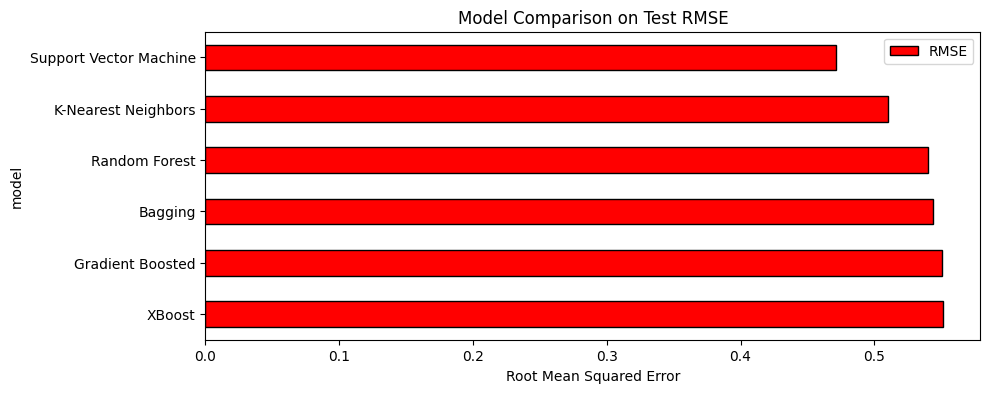

In [58]:
model_comparison = pd.DataFrame({'model': [ 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors', 'Bagging','XBoost'],
                                 'RMSE': [svr_RMSE, random_forest_RMSE,
                                         gradient_boosted_RMSE, knn_RMSE,bagging_RMSE,xboost_RMSE]})

model_comparison.sort_values('RMSE', ascending = False).plot(x = 'model',
                                                             y = 'RMSE', kind = 'barh', color = 'red',
                                                             edgecolor = 'black', figsize = (10,4))
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison on Test RMSE')
plt.show()

In [59]:
SVM = SVR().fit(X_train, Y_train.ravel())
score = SVM.score(X_train, Y_train)
print('R_squared:', score)
print('RMSE:', svr_RMSE)

R_squared: 0.8873301230904916
RMSE: 0.47132559184049727


In [60]:
HousePrice_Prediction_with_log = SVM.predict(X_test)
HousePrice_Prediction_with_log

array([11.67331478, 12.02302764, 12.10646058, ..., 11.96611778,
       11.65541846, 12.27776084])

In [61]:
HousePrice_Prediction_without_log = np.exp(HousePrice_Prediction_with_log)
HousePrice_Prediction_without_log

array([117396.78215015, 166546.13492393, 181037.69987283, ...,
       157332.67375509, 115314.50045709, 214864.06293624])

In [62]:
submission = pd.DataFrame()
submission['Id'] = test_data.Id
submission['SalePrice'] = HousePrice_Prediction_without_log

In [63]:
# checking the dataset
submission

,Id,SalePrice
0,1461,117396.782150
1,1462,166546.134924
2,1463,181037.699873
3,1464,200325.377181
4,1465,186982.473085
...,...,...
1454,2915,85261.463708
1455,2916,87854.190275
1456,2917,157332.673755
1457,2918,115314.500457


In [64]:
submission.to_csv('submission.csv', index = False)